<a href="https://colab.research.google.com/github/domino1492/KR_kkunis/blob/main/WebScrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

API : 두 프로그램이 서로 데이터를 주고받기 위한 방법을 정의한 것

http://data4library.kr/api/loanItemSrch?authKey=1bece1ac39751f27906480adcb5922a5b83e9a2809338cc4bbea7633f397b36c&startDt=2023-08-01&endDt=2023-08-31&age=20&dtl_region=31070

http://data4library.kr/api/itemSrch?authKey=1bece1ac39751f27906480adcb5922a5b83e9a2809338cc4bbea7633f397b36c&libCode=[도서관코드]&
&startDt=[검색시작일자]
&endDt=[검색종료일자]
&pageNo=1
&pageSize=10

In [36]:
import requests

url="http://data4library.kr/api/loanItemSrch?authKey=1bece1ac39751f27906480adcb5922a5b83e9a2809338cc4bbea7633f397b36c&startDt=2023-08-01&endDt=2023-08-31&age=20&dtl_region=31070&format='JSON'"
r=requests.get(url)
data=r.json()
print(data)

{'response': {'request': {'startDt': '2023-08-01', 'endDt': '2023-08-31', 'age': '20', 'dtl_region': '31070', 'pageNo': 1, 'pageSize': 200}, 'resultNum': 200, 'numFound': 5000, 'docs': [{'doc': {'no': 1, 'ranking': '1', 'bookname': '아버지의 해방일지 :정지아 장편소설 ', 'authors': '지은이: 정지아', 'publisher': '창비', 'publication_year': '2022', 'isbn13': '9788936438838', 'addition_symbol': '03810', 'vol': '', 'class_no': '813.7', 'class_nm': '문학 > 한국문학 > 소설', 'loan_count': '14', 'bookImageURL': 'https://image.aladin.co.kr/product/30048/51/cover/8936438832_1.jpg', 'bookDtlUrl': 'https://data4library.kr/bookV?seq=6551957'}}, {'doc': {'no': 2, 'ranking': '2', 'bookname': '불편한 편의점 :김호연 장편소설 ', 'authors': '지은이: 김호연', 'publisher': '나무옆의자', 'publication_year': '2021', 'isbn13': '9791161571188', 'addition_symbol': '03810', 'vol': '', 'class_no': '813.7', 'class_nm': '문학 > 한국문학 > 소설', 'loan_count': '9', 'bookImageURL': 'https://image.aladin.co.kr/product/26942/84/cover/k582730818_1.jpg', 'bookDtlUrl': 'https://data

In [37]:
books=[]
for d in data['response']['docs']:
  books.append(d['doc'])
print(books)

[{'no': 1, 'ranking': '1', 'bookname': '아버지의 해방일지 :정지아 장편소설 ', 'authors': '지은이: 정지아', 'publisher': '창비', 'publication_year': '2022', 'isbn13': '9788936438838', 'addition_symbol': '03810', 'vol': '', 'class_no': '813.7', 'class_nm': '문학 > 한국문학 > 소설', 'loan_count': '14', 'bookImageURL': 'https://image.aladin.co.kr/product/30048/51/cover/8936438832_1.jpg', 'bookDtlUrl': 'https://data4library.kr/bookV?seq=6551957'}, {'no': 2, 'ranking': '2', 'bookname': '불편한 편의점 :김호연 장편소설 ', 'authors': '지은이: 김호연', 'publisher': '나무옆의자', 'publication_year': '2021', 'isbn13': '9791161571188', 'addition_symbol': '03810', 'vol': '', 'class_no': '813.7', 'class_nm': '문학 > 한국문학 > 소설', 'loan_count': '9', 'bookImageURL': 'https://image.aladin.co.kr/product/26942/84/cover/k582730818_1.jpg', 'bookDtlUrl': 'https://data4library.kr/bookV?seq=5962217'}, {'no': 3, 'ranking': '3', 'bookname': '밝은 밤 :최은영 장편소설 ', 'authors': '지은이: 최은영', 'publisher': '문학동네', 'publication_year': '2021', 'isbn13': '9788954681179', 'addition_sym

In [38]:
import pandas as pd

books_df=pd.DataFrame(books)
print(books_df)

      no ranking                 bookname                   authors  \
0      1       1     아버지의 해방일지 :정지아 장편소설                   지은이: 정지아   
1      2       2       불편한 편의점 :김호연 장편소설                   지은이: 김호연   
2      3       3          밝은 밤 :최은영 장편소설                   지은이: 최은영   
3      4       3   천 개의 공감 :김형경 심리치유 에세이                   지은이: 김형경   
4      5       3      목소리를 드릴게요 :정세랑 소설집                   지은이: 정세랑   
..   ...     ...                      ...                       ...   
195  196     123       세계의 끝과 하드보일드 원더랜드    지은이: 무라카미 하루키 ;옮긴이: 김난주   
196  197     123         글로벌 정치의 이해 - 개정판                 안문석 (지은이)   
197  198     123          책 읽고 매출의 신이 되다                     고명환 지음   
198  199     123     피터 드러커의 자기경영노트 - 개정판   피터 드러커 (지은이), 이재규 (옮긴이)   
199  200     123  외모 대여점 :이시카와 히로치카 장편소설   지은이: 이시카와 히로치카 ;옮긴이: 양지윤   

       publisher publication_year         isbn13 addition_symbol vol class_no  \
0             창비             2022  9788936438838           03810  

In [39]:
books=books_df[['no','ranking','bookname','authors','publisher','publication_year','isbn13']]
books.head()

,no,ranking,bookname,authors,publisher,publication_year,isbn13
0,1,1,아버지의 해방일지 :정지아 장편소설,지은이: 정지아,창비,2022,9788936438838
1,2,2,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자,2021,9791161571188
2,3,3,밝은 밤 :최은영 장편소설,지은이: 최은영,문학동네,2021,9788954681179
3,4,3,천 개의 공감 :김형경 심리치유 에세이,지은이: 김형경,사람풍경,2012,9788996773238
4,5,3,목소리를 드릴게요 :정세랑 소설집,지은이: 정세랑,아작,2020,9791165300005


In [40]:
books_df.loc[[0,2],['bookname','authors']]
books_df.loc[0:2,'bookname':'publisher']
books_df.loc[:,'no':'publisher']

,no,ranking,bookname,authors,publisher
0,1,1,아버지의 해방일지 :정지아 장편소설,지은이: 정지아,창비
1,2,2,불편한 편의점 :김호연 장편소설,지은이: 김호연,나무옆의자
2,3,3,밝은 밤 :최은영 장편소설,지은이: 최은영,문학동네
3,4,3,천 개의 공감 :김형경 심리치유 에세이,지은이: 김형경,사람풍경
4,5,3,목소리를 드릴게요 :정세랑 소설집,지은이: 정세랑,아작
...,...,...,...,...,...
195,196,123,세계의 끝과 하드보일드 원더랜드,지은이: 무라카미 하루키 ;옮긴이: 김난주,민음사
196,197,123,글로벌 정치의 이해 - 개정판,안문석 (지은이),한울(한울아카데미)
197,198,123,책 읽고 매출의 신이 되다,고명환 지음,한국경제신문
198,199,123,피터 드러커의 자기경영노트 - 개정판,"피터 드러커 (지은이), 이재규 (옮긴이)",한국경제신문


In [41]:
book_name='아버지의 해방일지'
url='https://www.yes24.com/Product/Search?domain=ALL&query={}'
r=requests.get(url.format(book_name))
print(r.text)






	<!DOCTYPE html >
	<html lang="ko">

<head>
	<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
	<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
	<meta http-equiv="Accept-CH" content="dpr, width, viewport-width, rtt, downlink, ect, UA, UA-Platform, UA-Arch, UA-Model, UA-Mobile, UA-Full-Version" />
	<meta http-equiv="Accept-CH-Lifetime" content="86400" />
	<meta name="referrer" content="unsafe-url" />
	<meta name="viewport" content="width=1170" />

	<title> 아버지의 해방일지 - 예스24</title> 

	<meta name="title" content="예스24" />
	<meta name="description" content="YOUR EVERY STORY 문화 콘텐츠 플랫폼, 예스24" />
	<meta name="keywords" content="인터넷 서점, 온라인 쇼핑, 상품 추천, 쇼핑몰, 상품 검색, 도서 정보, 국내도서, 외국도서, 전자책, eBook, 이북, 크레마, 공연, 콘서트, 뮤지컬, 음반, 예매, DVD, 블루레이, 예스24, YES24, 교보문고, 알라딘" />


	<link title="YES24" rel="search" type="application/opensearchdescription+xml" href="//www.yes24.com/OpensearchDescription.xml">

	<script type="text/javascript" src="https://image.yes24.com/sysimage/C

In [42]:
from bs4 import BeautifulSoup

#패키지>모듈>클래스or함수or변수
bs=BeautifulSoup(r.text,'html.parser')
print(bs)


<!DOCTYPE html >

<html lang="ko">
<head>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="dpr, width, viewport-width, rtt, downlink, ect, UA, UA-Platform, UA-Arch, UA-Model, UA-Mobile, UA-Full-Version" http-equiv="Accept-CH"/>
<meta content="86400" http-equiv="Accept-CH-Lifetime"/>
<meta content="unsafe-url" name="referrer"/>
<meta content="width=1170" name="viewport"/>
<title> 아버지의 해방일지 - 예스24</title>
<meta content="예스24" name="title"/>
<meta content="YOUR EVERY STORY 문화 콘텐츠 플랫폼, 예스24" name="description"/>
<meta content="인터넷 서점, 온라인 쇼핑, 상품 추천, 쇼핑몰, 상품 검색, 도서 정보, 국내도서, 외국도서, 전자책, eBook, 이북, 크레마, 공연, 콘서트, 뮤지컬, 음반, 예매, DVD, 블루레이, 예스24, YES24, 교보문고, 알라딘" name="keywords"/>
<link href="//www.yes24.com/OpensearchDescription.xml" rel="search" title="YES24" type="application/opensearchdescription+xml"/>
<script src="https://image.yes24.com/sysimage/Contents/Scripts/m/common/xds.min.js?v=20210909" type="t

In [43]:
prd_link=bs.find('a',attrs={'class':'gd_name'})
print(prd_link)

<a class="gd_name" href="/Product/Goods/112253263" onclick="wiseLogV2('S', '101_005_003_001', ''); setGoodsClickExtraCodeHub('032', '아버지의 해방일지', '112253263', '0');">아버지의 해방일지</a>









	<!DOCTYPE html >
	<html lang="ko">

<head><link rel="canonical" href="https://www.yes24.com/Product/Goods/112253263"> <link rel="alternate" media="only screen and(max-width: 640px)"  href="https://m.yes24.com/Goods/Detail/112253263">
	<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
	<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
	<meta http-equiv="Accept-CH" content="dpr, width, viewport-width, rtt, downlink, ect, UA, UA-Platform, UA-Arch, UA-Model, UA-Mobile, UA-Full-Version" />
	<meta http-equiv="Accept-CH-Lifetime" content="86400" />
	<meta name="referrer" content="unsafe-url" />
	<meta name="viewport" content="width=1170" />

	<title>아버지의 해방일지 - 예스24 </title> 

	
<meta name="title" content="아버지의 해방일지"/>
<meta name="author" content="정지아 저" />
	
<meta name="description" content="정지아 저. 창비. 판매가 13,500원(10% 할인). 포인트 750원(5% 적립). 새삼스럽게 경탄스럽다!압도적인 몰입감, 가슴 먹먹한 감동정지아의 손끝에서 펼쳐지는 시대의 온기미스터리 같은 한 남자가 헤쳐온 역사의 격랑그 안에서 발견하는 끝끝내 강인한 우..."/>
	
<meta name="keyw
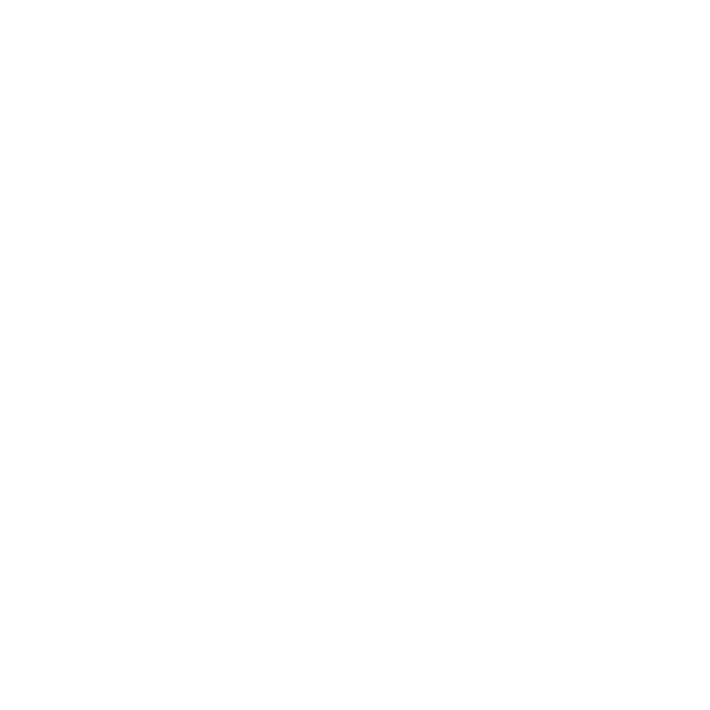
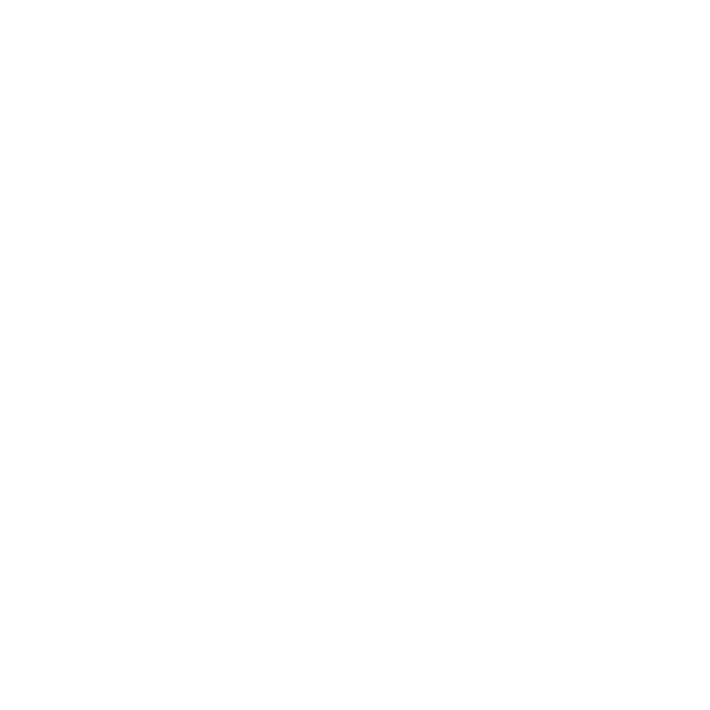
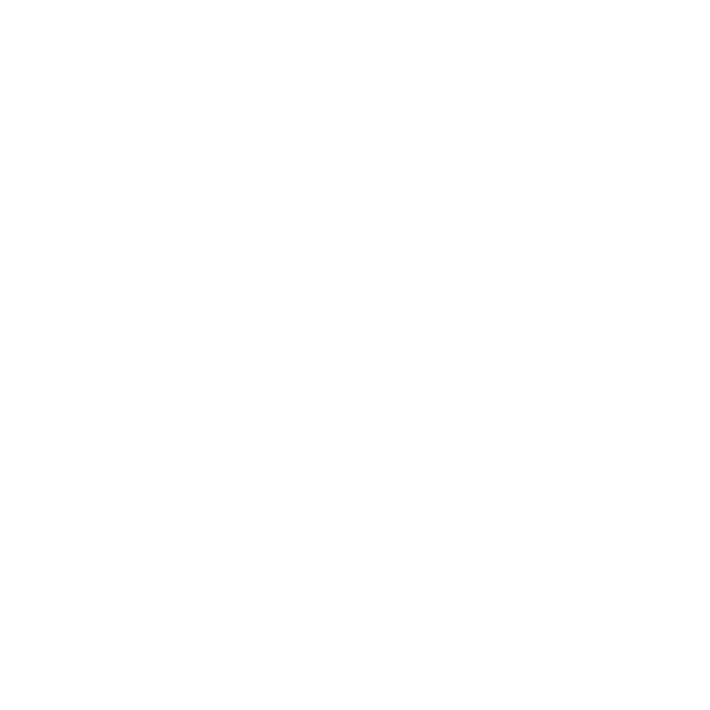
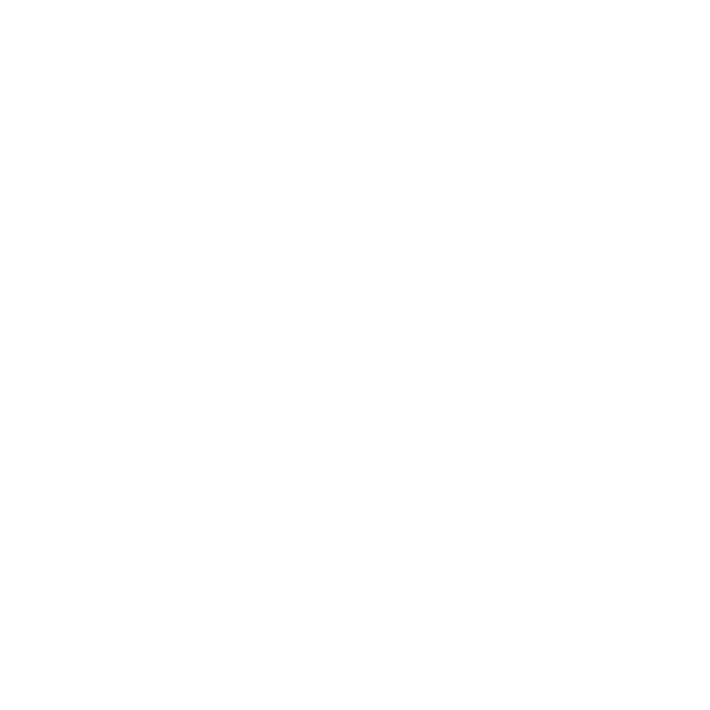
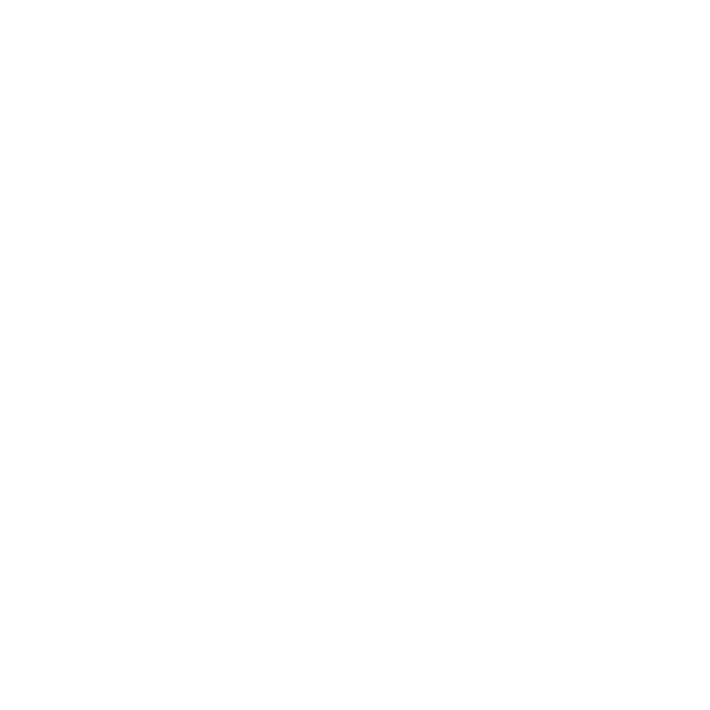
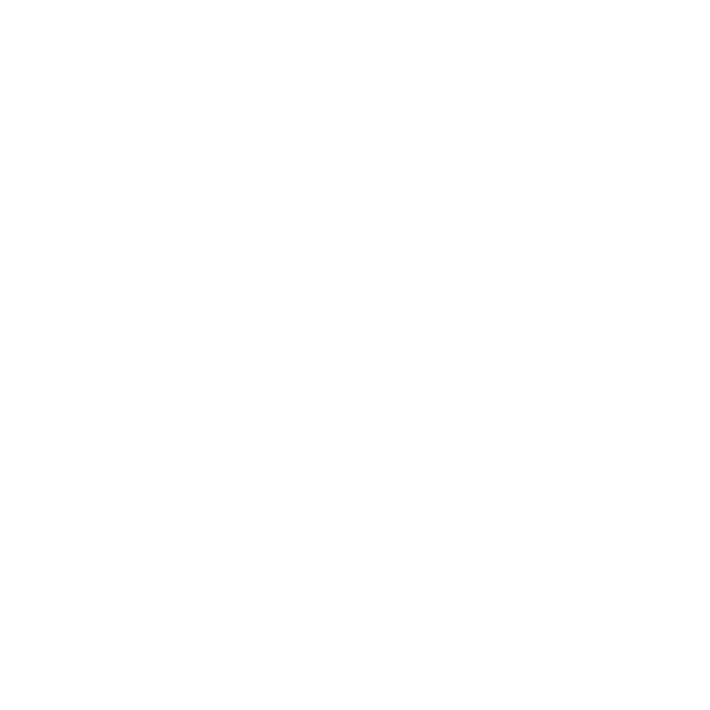
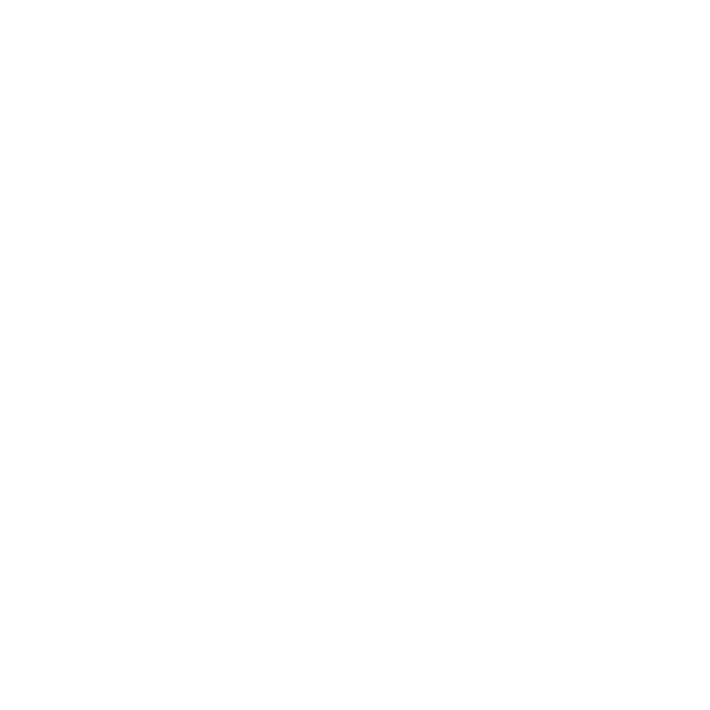
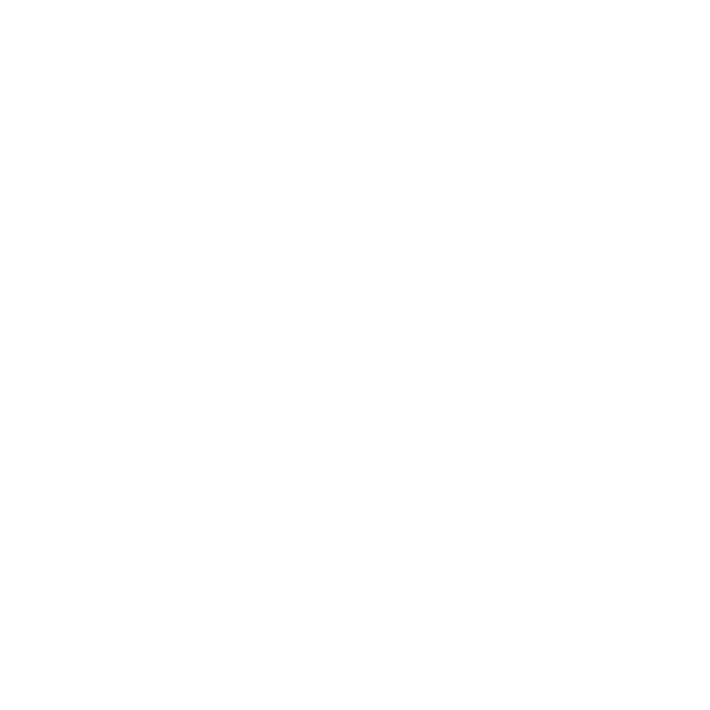
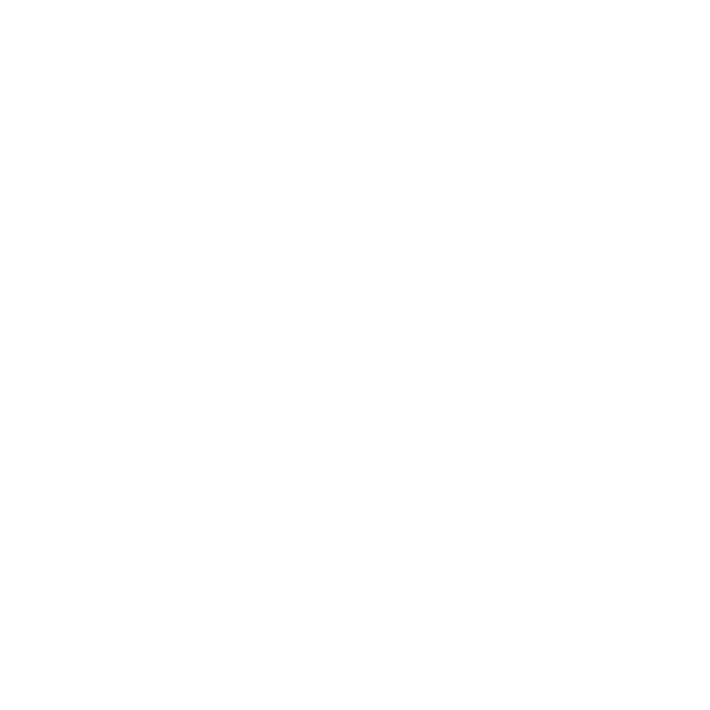
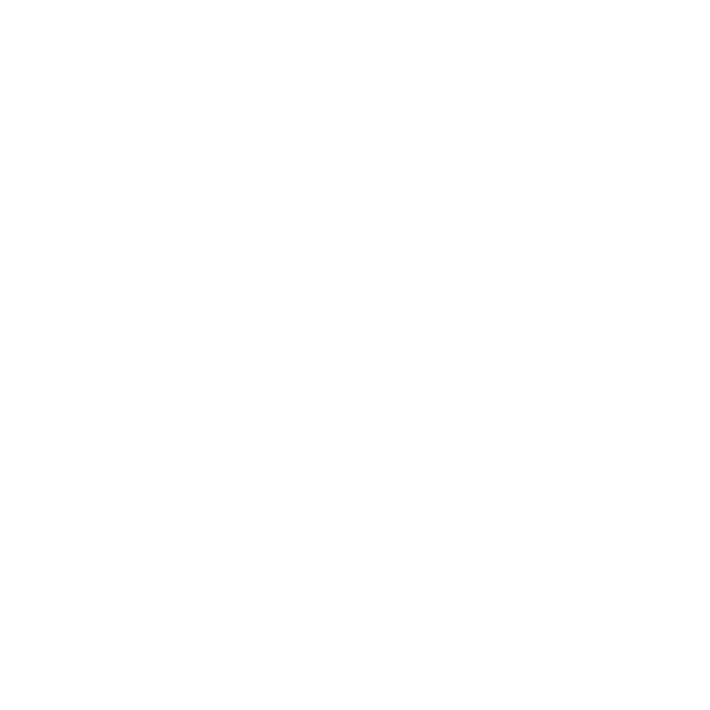

In [44]:
detail_url='http://www.yes24.com'+prd_link['href']
detail_r=requests.get(detail_url)
print(detail_r.text)

In [45]:
detail_soup=BeautifulSoup(detail_r.text,'html.parser')
prd_detail=detail_soup.find('div',attrs={'id':'infoset_specific'})
prd_tr_list=prd_detail.find_all('tr')
print(prd_tr_list)

[<tr>
<th class="txt" scope="row">발행일</th>
<td class="txt lastCol">2022년 09월 02일</td>
</tr>, <tr>
<th class="txt" scope="row">쪽수, 무게, 크기</th>
<td class="txt lastCol">268쪽 | 288g | 122*188*16mm</td>
</tr>, <tr>
<th class="txt" scope="row">ISBN13</th>
<td class="txt lastCol">9788936438838</td>
</tr>, <tr>
<th class="txt" scope="row">ISBN10</th>
<td class="txt lastCol">8936438832</td>
</tr>]


In [ ]:
prd